<a href="https://colab.research.google.com/github/Shamiso-Tirivanhu/Breast-Cancer-Detection-Using-Python-Machine-learning-/blob/main/Breast_Cancer_Detection_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import all the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn  import metrics

In [5]:
#Load the data
from google.colab import files
upload = files.upload()
df = pd.read_csv("breast_cancer_csv.csv")
df.head(5)

Saving breast_cancer_csv.csv to breast_cancer_csv (2).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Count the number of rows and columns in the dataset
df.shape

(569, 32)

In [7]:
#Count of the number of empty values in each column
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
#Get the count of number of rows and columns
df.shape

(569, 32)

In [9]:

#Get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='count', ylabel='diagnosis'>

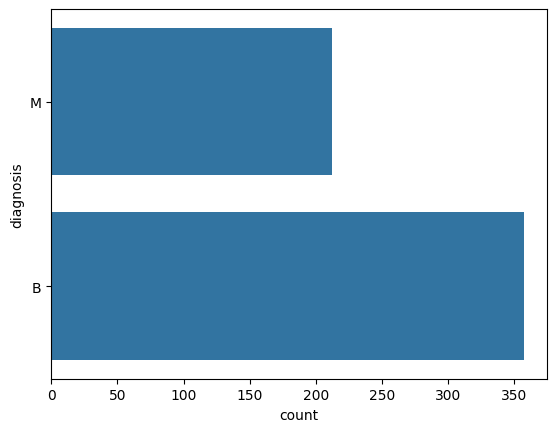

In [10]:
#Visualize the count
sns.countplot(df['diagnosis'], label ='count')

In [11]:
#Look at the data types to see which columns need to be encoded
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [12]:
#Encode the categorical data Values
from sklearn.preprocessing import LabelEncoder
Labelencoder_Y = LabelEncoder()
df.iloc[:,1] = Labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


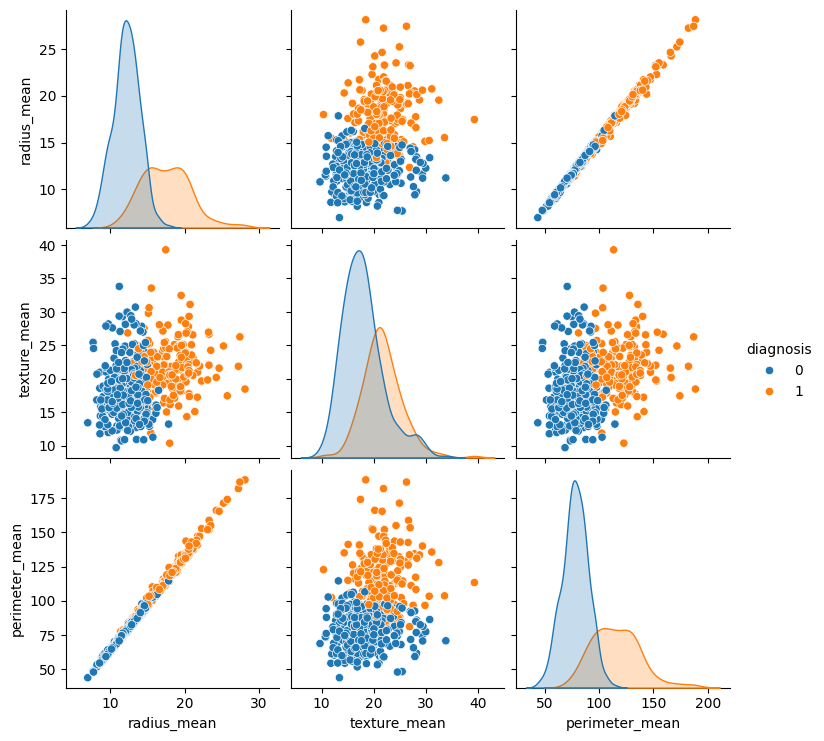

In [13]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5],hue ='diagnosis')

In [14]:
#Print the first five rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#Gwt the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

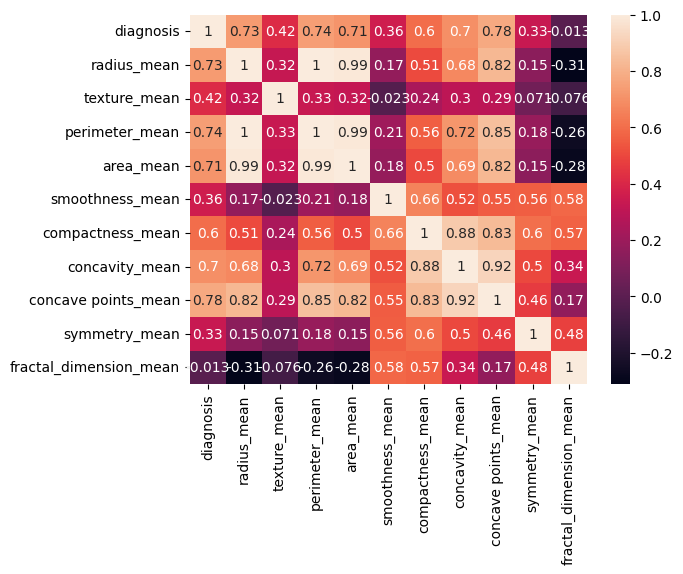

In [16]:
#Visualize the correlation
sns.heatmap(df.iloc[:,1:12].corr(), annot = True)

In [17]:
#Split the data set into independent (X) and dependent (Y) data sets
X= df.iloc[:,2:32].values
Y = df.iloc[:,1].values


In [18]:
#Split the data set into 75& and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)


In [19]:
#Sccale the data [ Feature scaling]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [20]:
# Displaying the Xtrain shape
X_train.shape


(426, 30)

In [21]:
#Apply Machine Learning Algorithm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
Y_train = Y_train.astype(int)
log_reg.fit(X_train, Y_train)


LogisticRegression()

In [22]:
Y_pred = log_reg.predict(X_test)

In [23]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [24]:
#Checking for accuracy score for the testing data
from sklearn.metrics import accuracy_score
Y_test = Y_test.astype(int)
print(accuracy_score(Y_test, log_reg.predict(X_test)))

0.958041958041958


In [25]:
#Checking accuracy for the training data
from sklearn.metrics import accuracy_score
Y_train = Y_train.astype(int)
print(accuracy_score(Y_train, log_reg.predict(X_train)))

0.9906103286384976


# New section

In [26]:
!pip install confusion_metrics

In [27]:
#Checking for confusion_metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[86,  4],
       [ 2, 51]])

In [28]:
#Checking for classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



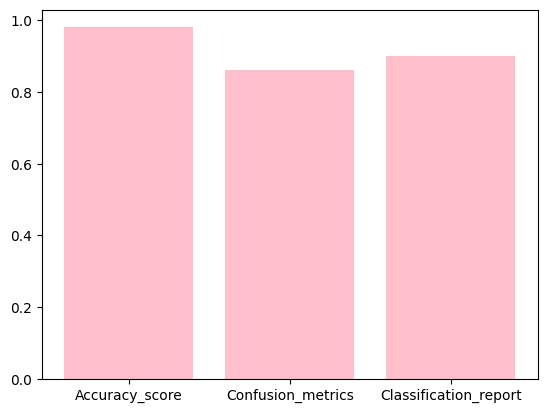

In [29]:
#Visualizing data of the accuracy_score,confusion_metrics & classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.title = ['Diagramatic representation of accuracy_score, confusion_metrics & classification_report']
plt.xabel = ['Display of accuracy_score, confusion_metrics & classfication_report']
plt.ylabel = ['Logistic Regression']
x_values = ['Accuracy_score', 'Confusion_metrics', 'Classification_report']
y_values = [0.98,0.86,0.9]
plt.bar(x_values,y_values, color='pink')
plt.show()

In [30]:
#Using adavanced Algorithms - KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
#Predicting data using KNN algorithm
Y_pred = knn.predict(X_test)

In [32]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [33]:
#Checking for accuracy of testing data
from sklearn.metrics import accuracy_score
Y_test = Y_test.astype(int)
print(accuracy_score(Y_test,knn.predict(X_test)))

0.951048951048951


In [34]:
#Checking for confusion_metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[89,  1],
       [ 6, 47]])

In [35]:
#Checking for classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



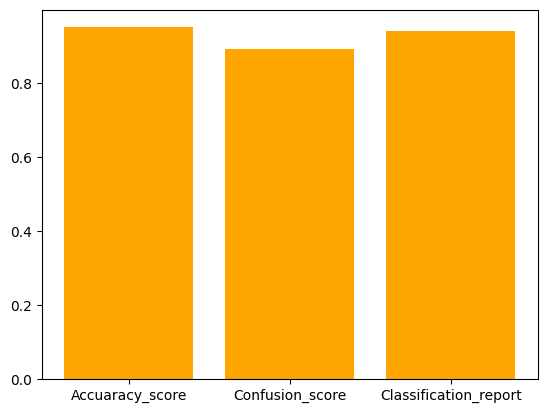

In [36]:
#Visualizing the accuracy_score,confusion_metrics classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt_set_title = ['Diagramtic representation of accuracy_score, confusion_metrics & classification_report']
plt_set_xlabel = ['Display of accuracy_score, confusion_metrics & classification_report']
plt_set_ylabel = ['KNN']
x_values = ['Accuaracy_score', 'Confusion_score', 'Classification_report']
y_values = [0.95,0.89,0.94]
plt.bar(x_values, y_values, color='orange')
plt.show()

In [37]:
#Using SVM algorithm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [38]:
#Predict data using SVM
Y_pred = svm.predict(X_test)

In [39]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [40]:
#Checking for accuracy of testing data
from  sklearn.metrics import accuracy_score
Y_test = Y_test.astype(int)
print(accuracy_score(Y_test,svm.predict(X_test)))

0.965034965034965


In [41]:
#Checking for confusion_metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[88,  2],
       [ 3, 50]])

In [42]:
#Checking for classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



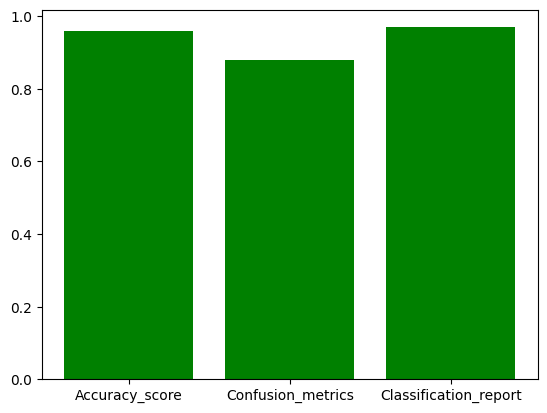

In [43]:
# Visualizing the accuracy_score, classification_score and confusion_metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.title = ['Diagramatic representation of accuracy_score,confusion_metrics & classification_report']
plt.xlabel = ['Dusplay accuracy_score, confusion_metrics & classification_report']
plt.ylabel = ['SVM']
x_values = ['Accuracy_score', 'Confusion_metrics', 'Classification_report']
y_values = [0.96,0.88,0.97]
plt.bar(x_values,y_values, color='green')
plt.show()



In [44]:
#Using rhe Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [45]:
#Predicting data using Decsison Tree Algorithm
Y_pred = dt.predict(X_test)


In [46]:
# Displaying the Y_pred array
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [47]:
#Checking for accuracy_score
from sklearn.metrics import accuracy_score
Y_test = Y_test.astype(int)
print(accuracy_score(Y_test,dt.predict(X_test)))

0.9230769230769231


In [48]:
#Checking for confusion_metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[81,  9],
       [ 2, 51]])

In [49]:
#Check for classificaion report
from sklearn.metrics import classification_report
Y_test = Y_test.astype(int)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        90
           1       0.85      0.96      0.90        53

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



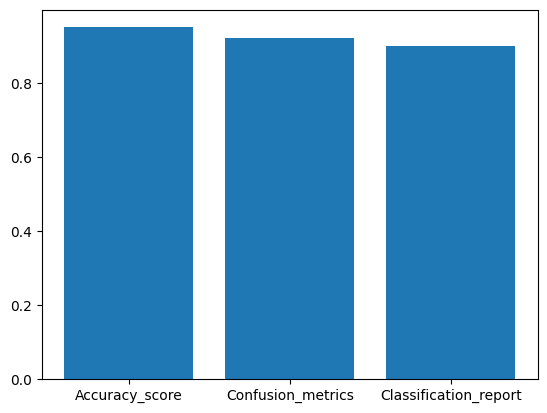

In [50]:
#A Graph showcasing the accuracy_scorre, confusion_metrics and classification report of thr Decision Tree
import matplotlib.pyplot as plt
import seaborn as sns
plt.set_xlabel = ['Display of accuracy_score,confusion_metrics & classification_report']
plt.set_ylable = ['Decision Tree']
plt.set_title = ['Diagramatic representation of accuracy_score,confusion_metrics & classification_report']
x_values =['Accuracy_score','Confusion_metrics', 'Classification_report']
y_values = [0.95,0.92,0.90]
plt.bar(x_values,y_values)
plt.show()

